# DSC 530 Final Project
## Gun Violence
### Jessica Everett
8/11/2019

#### Data Set: Gun Violence Data
Retrieved from: https://www.kaggle.com/jameslko/gun-violence-data/downloads/gun-violence-data.zip/1

This dataset includes all gun violence incidences in the USA between 2013 and 2018. Its variables include: date, state, number killed, number injured, and number of guns involved in the incident.

In [1]:
from __future__ import print_function, division

%matplotlib inline
import random
import sys
import numpy as np
import thinkstats2
import pandas as pd
import first
import thinkplot
import nsfg

In [2]:
# Read data into a Pandas DataFrame

gv = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [3]:
gv.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
gv.tail()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0
239676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,...,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111.0,3.0


In [5]:
gv.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [6]:
# number of occurrences by state
gv.state.value_counts().sort_index()

Alabama                  5471
Alaska                   1349
Arizona                  2328
Arkansas                 2842
California              16306
Colorado                 3201
Connecticut              3067
Delaware                 1685
District of Columbia     3195
Florida                 15029
Georgia                  8925
Hawaii                    289
Idaho                     661
Illinois                17556
Indiana                  5852
Iowa                     2517
Kansas                   2145
Kentucky                 4157
Louisiana                8103
Maine                     907
Maryland                 5798
Massachusetts            5981
Michigan                 6136
Minnesota                2408
Mississippi              3599
Missouri                 6631
Montana                   638
Nebraska                 1651
Nevada                   1952
New Hampshire             964
New Jersey               5387
New Mexico               1645
New York                 9712
North Caro

In [7]:
# find nan or null values
gv.state.isnull().sum()

0

In [8]:
# number of occurrences by n_killed
gv.n_killed.value_counts().sort_index()

0     185835
1      48436
2       4604
3        595
4        139
5         41
6         11
7          2
8          5
9          3
10         1
11         1
16         1
17         1
27         1
50         1
Name: n_killed, dtype: int64

In [9]:
# find nan or null values
gv.n_killed.isnull().sum()

0

In [10]:
# number of occurrences by n_injured
gv.n_injured.value_counts().sort_index()

0     142487
1      81986
2      11484
3       2513
4        760
5        241
6         91
7         51
8         19
9         12
10         6
11         4
12         5
13         2
14         3
15         2
16         2
17         2
18         1
19         3
20         1
25         1
53         1
Name: n_injured, dtype: int64

In [11]:
# find nan or null values
gv.n_injured.isnull().sum()

0

In [12]:
# number of occurrences by n_guns_involved
gv.n_guns_involved.value_counts().sort_index()

1.0      127548
2.0        7477
3.0        2021
4.0         871
5.0         435
6.0         285
7.0         232
8.0         137
9.0         111
10.0        103
11.0         67
12.0         93
13.0         67
14.0         53
15.0         54
16.0         41
17.0         56
18.0         34
19.0         25
20.0         48
21.0         25
22.0         31
23.0         22
24.0         18
25.0         31
26.0         17
27.0         21
28.0         14
29.0         11
30.0         36
          ...  
100.0         5
103.0         1
107.0         1
111.0         1
112.0         1
114.0         1
115.0         1
127.0         1
130.0         1
138.0         3
145.0         1
151.0         1
152.0         1
158.0         1
170.0         1
183.0         1
189.0         1
191.0         1
200.0         2
225.0         1
268.0         1
276.0         1
280.0         1
300.0         3
323.0         1
338.0         1
346.0         1
374.0         1
399.0         1
400.0         4
Name: n_guns_involved, L

In [13]:
# find nan or null values
gv.n_guns_involved.isnull().sum()

99451

In [14]:
# fill in null values
gv.n_guns_involved = gv.n_guns_involved.interpolate(limit_direction='backward')

In [15]:
# find nan or null values
gv.n_guns_involved.isnull().sum()

0

In [16]:
# number of occurrences by date
gv.date.value_counts().sort_index()

2013-01-01      3
2013-01-05      1
2013-01-07      2
2013-01-19      1
2013-01-21      2
2013-01-23      2
2013-01-25      1
2013-01-26      3
2013-02-02      1
2013-02-03      1
2013-02-07      1
2013-02-09      1
2013-02-11      2
2013-02-12      1
2013-02-19      1
2013-02-21      1
2013-02-22      1
2013-02-23      1
2013-02-24      1
2013-03-02      1
2013-03-03      2
2013-03-04      1
2013-03-05      1
2013-03-07      1
2013-03-10      1
2013-03-11      1
2013-03-13      2
2013-03-14      1
2013-03-16      1
2013-03-17      2
             ... 
2018-03-02    141
2018-03-03    124
2018-03-04    157
2018-03-05    191
2018-03-06    145
2018-03-07    151
2018-03-08    135
2018-03-09    137
2018-03-10    157
2018-03-11    145
2018-03-12    175
2018-03-13    146
2018-03-14    180
2018-03-15    165
2018-03-16    125
2018-03-17    178
2018-03-18    198
2018-03-19    154
2018-03-20    150
2018-03-21    151
2018-03-22    169
2018-03-23    127
2018-03-24    185
2018-03-25    172
2018-03-26

In [17]:
# find nan or null values
gv.date.isnull().sum()

0

So far in a quick overview of the elements of this data set, we can see that most gun violence occurs in Illinois. We can also see that most gun violence results in 0 deaths and 0 injured with 1 guns. Let's go deeper into the data to determine if the number of guns involved increases the chance of death or injury. First I will explore the data using histograms.

In [18]:
import matplotlib.pyplot as pp

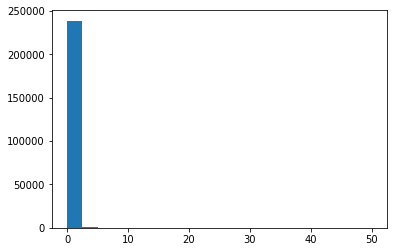

In [19]:
# A majority of gun violence results in 0 deaths.
pp.hist(gv.n_killed, bins=20)
pp.show()

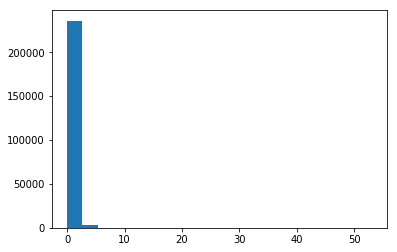

In [20]:
# A majority of gun violence results in 0 injuries.
pp.hist(gv.n_injured, bins = 20)
pp.show()

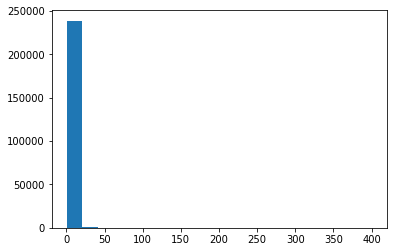

In [21]:
# A large majority of gun violence involves 1 gun.
pp.hist(gv.n_guns_involved, bins=20)
pp.show()

In [22]:
# Create groups to compare incidents including 1 gun or more guns
one = gv[gv.n_guns_involved == 1]
more = gv[gv.n_guns_involved != 1]

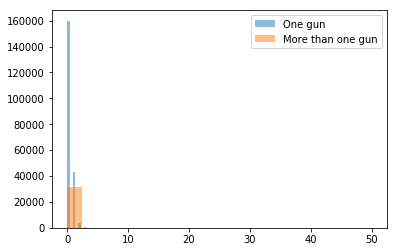

In [23]:
# number of deaths
pp.hist(one.n_killed, bins = 20, alpha=0.5, label='One gun')
pp.hist(more.n_killed, bins=20, alpha=0.5, label='More than one gun')
pp.legend()
pp.show()

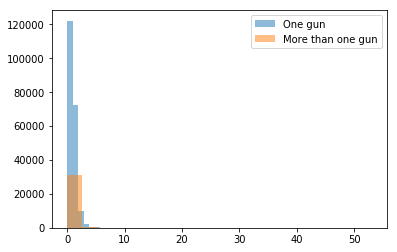

In [24]:
# number of injuries
pp.hist(one.n_injured, bins = 20, alpha=0.5, label='One gun')
pp.hist(more.n_injured, bins=20, alpha=0.5, label='More than one gun')
pp.legend()
pp.show()

It appears that most gun violence involves 1 gun and 0 deaths or injuries. More than one gun is less common and doesn't appear to increase the chance of injury or death. By looking at these histograms, it is obvious that the numerical variables include outliers. This is probably because mass shootings are rare compared with the typical incident. I will remove the extraordinary incidents so we can view just what is happening on a typical, day to day basis.

In [25]:
# Out of the total of 239,677 lines, only 1,996 instances involved more than 10 guns.
gv.loc[gv.n_guns_involved>10]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
7607,110715,2014-02-27,Mississippi,Diberville,4515 Popps Ferry Rd,0,0,http://www.gunviolencearchive.org/incident/110715,http://www.ksla.com/story/28585972/man-indicte...,False,...,0::27||1::30,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Kevin Parfait||1::John Ross Harold,NaN,0::Unharmed||1::Unharmed,0::Subject-Suspect||1::Subject-Suspect,http://www.sunherald.com/2014/02/27/5373900/di...,115.0,50.0
7608,110672,2014-02-27,Utah,Sandy,104th South State Street,0,0,http://www.gunviolencearchive.org/incident/110672,http://www.4utah.com/story/d/story/a-gun-is-ac...,False,...,NaN,0::Adult 18+,0::Male,NaN,NaN,0::Unharmed,0::Subject-Suspect,http://www.4utah.com/story/d/story/a-gun-is-ac...,45.0,9.0
7609,110797,2014-02-27,Florida,North Fort Myers,Swanson Loop,0,0,http://www.gunviolencearchive.org/incident/110797,http://www.nbc-2.com/story/24852711/man-preppi...,False,...,1::63,0::Adult 18+||1::Adult 18+,0::Female||1::Male,"1::Robert Mabry, Jr.",NaN,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.nbc-2.com/story/24852711/man-preppi...,79.0,30.0
7610,112377,2014-02-27,Kentucky,Frankfort,8000 John Davis Drive,0,0,http://www.gunviolencearchive.org/incident/112377,http://www.lex18.com/news/ksu-basketball-playe...,False,...,0::24,0::Adult 18+,0::Male,0::Devan Crain,NaN,0::Unharmed,0::Subject-Suspect,http://www.state-journal.com/local%20news/2014...,NaN,NaN
7611,111228,2014-02-27,Mississippi,Jackson,130 N. Alabama Ave.,1,0,http://www.gunviolencearchive.org/incident/111228,http://www.msnewsnow.com/story/24852213/fatal-...,False,...,0::29,0::Adult 18+,0::Male,0::Christopher Sheppard,NaN,0::Killed,0::Victim,http://www.msnewsnow.com/story/24852213/fatal-...,68.0,27.0
9022,114624,2014-03-13,Alabama,Killen,4801 US-43,0,0,http://www.gunviolencearchive.org/incident/114624,http://www.waff.com/story/27491769/man-accused...,False,...,NaN,0:Adult 18+,0:Male,0:Kenneth Roden,NaN,0:Unharmed,0:Subject-Suspect,http://www.waff.com/story/24966774/30-guns-sto...,1.0,1.0
9023,115181,2014-03-13,Texas,El Paso,NaN,1,0,http://www.gunviolencearchive.org/incident/115181,http://thepolicenews.net/default.aspx?act=News...,False,...,0:32,0:Adult 18+,0:Male,0:Border Patrol Agent Esteban Manzanares,NaN,0:Killed,0:Subject-Suspect,http://www.ksat.com/news/dead-border-agent-sus...,77.0,29.0
9024,114451,2014-03-13,Minnesota,Duluth,3100 West Third St,0,0,http://www.gunviolencearchive.org/incident/114451,http://www.duluthnewstribune.com/event/article...,False,...,0:33,0:Adult 18+,0:Male,0:Joseph Michael Bonneville,NaN,0:Unharmed,0:Subject-Suspect,http://www.duluthnewstribune.com/event/article...,NaN,7.0
9025,114638,2014-03-13,Washington,Bellevue,NaN,0,0,http://www.gunviolencearchive.org/incident/114638,http://blog.seattlepi.com/seattle911/2014/03/1...,False,...,1:20,0:Adult 18+|1:Adult 18+,1:Female,NaN,NaN,0:Unharmed|1:Unharmed,0:Victim|1:Subject-Suspect,http://blog.seattlepi.com/seattle911/2014/03/1...,48.0,48.0
9026,117494,2014-03-13,Arizona,Phoenix,Seventh Avenue and Osborn Road,0,0,http://www.gunviolencearchive.org/incident/117494,http://www.azfamily.com/news/Police-still-sear...,False,...,0:20,0:Adult 18+,0:Male,NaN,NaN,0:Unharmed,0:Subject-Suspect,http://www.azfamily.com/news/Police-still-sear...,24.0,24.0


In [26]:
# number killed was over 10 for only 5 instances
gv.loc[gv.n_killed>10]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
194,480366,2013-09-16,District of Columbia,Washington Navy Yard,1336 Isaac Hull Ave,11,3,http://www.gunviolencearchive.org/incident/480366,https://www.washingtonpost.com/local/police-se...,False,...,0::59||1::53||2::51||3::53||4::62||5::73||6::5...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Femal...,0::Michael Arnold||1::Martin Bodrog||2::Arthur...,15::Co-worker,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.nbcwashington.com/news/local/Confir...,NaN,NaN
101531,456893,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19,http://www.gunviolencearchive.org/incident/456893,http://www.latimes.com/local/lanow/la-me-ln-sa...,False,...,0::42||1::58||2::52||3::37||4::40||5::27||6::4...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Male||5::Female|...,0::Larry Daniel Kaufman||1::Damian Meins||2::N...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.sbsun.com/general-news/20151202/14-...,40.0,23.0
130448,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,http://www.gunviolencearchive.org/incident/577157,https://www.reuters.com/article/us-orlando-sho...,False,...,0::34||1::23||2::20||3::22||4::36||5::22||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Edward Sotomayor Jr||1::Stanley Almodovar I...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cityoforlando.net/police/mass-shoot...,47.0,12.0
217151,980577,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20,http://www.gunviolencearchive.org/incident/980577,http://abc7.com/full-list-of-texas-church-shoo...,False,...,0::14||1::7||2::5||3::30||4::58||5::60||6::36|...,0::Teen 12-17||1::Child 0-11||2::Child 0-11||3...,0::Female||1::Female||2::Female||3::Female||4:...,0::Annabelle Renee Pomeroy||1::Emily Garcia||2...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://13wham.com/news/nation-world/multiple-i...,44.0,21.0
232745,1049217,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17,http://www.gunviolencearchive.org/incident/104...,http://www.orlandosentinel.com/news/fl-florida...,False,...,0::35||1::14||2::17||3::37||4::14||5::15||6::4...,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Male||1::Male||2::Male||3::Male||4::Female|...,0::Scott Beigel||1::Martin Duque Anguiano||2::...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://cbs12.com/news/local/shooting-at-marjor...,96.0,29.0


In [27]:
# number injured was over 10 for only 27 instances
gv.loc[gv.n_injured>10]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
34,482771,2013-03-11,District of Columbia,Washington,1200 North Capitol Street,0,13,http://www.gunviolencearchive.org/incident/482771,https://www.washingtonpost.com/local/police-se...,False,...,0::19||1::19||2::17||15::21,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Craig Steven Wilson||1::Andrew Davon Allen|...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,http://www.washingtontimes.com/news/2013/may/2...,NaN,NaN
73,486209,2013-05-12,Louisiana,New Orleans,Frenchmen Street,0,19,http://www.gunviolencearchive.org/incident/486209,http://www.nola.com/crime/index.ssf/2015/09/mo...,False,...,17::10||18::10||19::19||20::23,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::JT||19::Akein Scott||20::Shawn Scott||21::S...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.upi.com/Top_News/US/2013/05/12/Abou...,97.0,4.0
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,False,...,0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0
213,480765,2013-10-05,California,Fresno,3883 E. Calwa #114,1,12,http://www.gunviolencearchive.org/incident/480765,http://sanfrancisco.cbslocal.com/2013/10/06/gu...,False,...,0::18,0::Adult 18+||2::Adult 18+||3::Adult 18+||4::A...,0::Male,0::Dejuan Gladney,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://sanfrancisco.cbslocal.com/2013/10/06/gu...,31.0,14.0
239,493842,2013-11-09,Texas,Cypress,7300 block of Enchanted Creek Drive,2,16,http://www.gunviolencearchive.org/incident/493842,http://www.dailymail.co.uk/news/article-250059...,False,...,0::17||1::16||2::16||18::21||19::18,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||1...,0::Male||1::Female||2::Male||18::Male||19::Male,0::Queric Richardson||1::Arielle Shepherd||2::...,NaN,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/pictures/victims-of-the...,132.0,18.0
6831,108626,2014-02-20,Florida,Saint Petersburg,NaN,0,12,http://www.gunviolencearchive.org/incident/108626,http://tbo.com/pinellas-county/teens-arrested-...,False,...,19::19||20::18||21::19,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,19::Male||20::Male||21::Male,19::James Anthony Chin||20::Christian Eduardo ...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://tbo.com/pinellas-county/teens-arrested-...,70.0,22.0
11566,121031,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16,http://www.gunviolencearchive.org/incident/121031,http://kdhnews.com/military/shooting-report-co...,False,...,0::39||1::37||2::38||19::34,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||1...,0::Sgt. First Class Daniel Ferguson||1::Sgt Ti...,NaN,0::Killed||1::Killed||2::Killed||3::Injured||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kbtx.com/home/headlines/Active-Shoo...,59.0,24.0
39222,197384,2014-09-28,Florida,Miami,NW 7th Ave and NW 64th Street,0,15,http:/

In [28]:
# drop number of guns outliers
indexNames=gv[gv['n_guns_involved']>10].index
gv.drop(indexNames, inplace=True)

In [29]:
# drop number of deaths outliers
indexNames=gv[gv['n_killed']>10].index
gv.drop(indexNames, inplace=True)

In [30]:
# drop number of injured outliers
indexNames=gv[gv['n_injured']>10].index
gv.drop(indexNames, inplace=True)

After dropping the outliers, I will rerun the histograms to get a clearer picture of what is happening in the typical gun violence incedent.

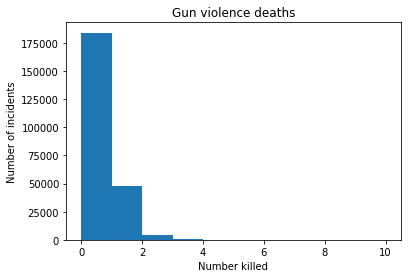

In [86]:
# Still shows that majority of gun violence results in 0 deaths, but now the trend is showing.
pp.hist(gv.n_killed)
pp.xlabel('Number killed')
pp.ylabel('Number of incidents')
pp.title('Gun violence deaths')
pp.show()

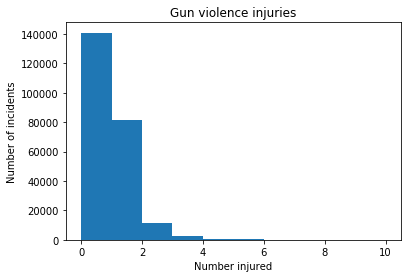

In [87]:
# Same thing with injuries.
pp.hist(gv.n_injured)
pp.xlabel('Number injured')
pp.ylabel('Number of incidents')
pp.title('Gun violence injuries')
pp.show()

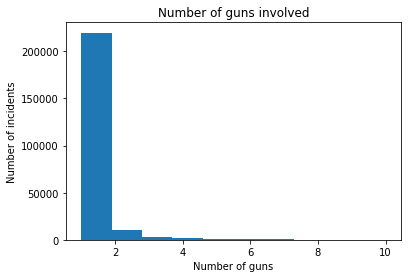

In [88]:
# The number of guns involved is still almost always 1.
pp.hist(gv.n_guns_involved)
pp.xlabel('Number of guns')
pp.ylabel('Number of incidents')
pp.title('Number of guns involved')
pp.show()

In [34]:
# Create groups to compare incidents including 1 gun or more guns
one = gv[gv.n_guns_involved == 1]
more = gv[gv.n_guns_involved != 1]

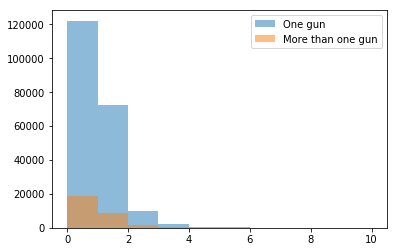

In [35]:
# number of injuries
pp.hist(one.n_injured, bins = 10, alpha=0.5, label='One gun')
pp.hist(more.n_injured, bins=10, alpha=0.5, label='More than one gun')
pp.legend()
pp.show()

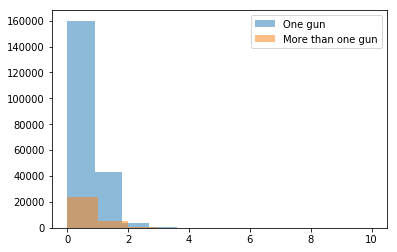

In [36]:
# number of deaths
pp.hist(one.n_killed, bins = 10, alpha=0.5, label='One gun')
pp.hist(more.n_killed, bins=10, alpha=0.5, label='More than one gun')
pp.legend()
pp.show()

The number of guns, deaths, and injuries are still mostly 1, 0, and 0 respectively, but after removing the outliers we can focus more on a typical episode of gun violence rather than the occasional extreme events. We can see more detail in the histograms. I will describe the variables now.

In [37]:
# mode of state
gv.state.mode()

0    Illinois
dtype: object

In [38]:
# mean of n_killed
gv.n_killed.mean()

0.2525794678150613

In [39]:
# mode of n_killed
gv.n_killed.mode()

0    0
dtype: int64

In [40]:
# variance of n_killed
gv.n_killed.var()

0.2563239089839868

In [41]:
# standard deviation of n_killed
gv.n_killed.std()

0.5062844151107032

In [42]:
# mean of n_injured
gv.n_injured.mean()

0.49383916581421095

In [43]:
# mode of n_injured
gv.n_injured.mode()

0    0
dtype: int64

In [44]:
# variance of n_injured
gv.n_injured.var()

0.4982160810436172

In [45]:
# standard deviation of n_injured
gv.n_injured.std()

0.7058442328471751

In [46]:
# mean of n_guns_involved
gv.n_guns_involved.mean()

1.1764467689890499

In [47]:
# mode of n_guns_involved
gv.n_guns_involved.mode()

0    1.0
dtype: float64

In [48]:
# variance of n_guns_involved
gv.n_guns_involved.var()

0.49441661044673507

In [49]:
# standard deviation of n_guns_involved
gv.n_guns_involved.std()

0.7031476448419173

In [50]:
# mode of date
gv.date.mode()

0    2017-01-01
dtype: object

Compare two scenarios in the data using a PMF.

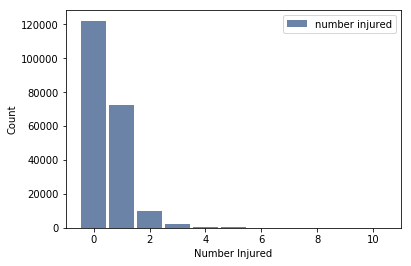

In [51]:
# histogram of n_injuries with only 1 gun
hist = thinkstats2.Hist(one.n_injured, label='number injured')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number Injured', ylabel='Count')

In [52]:
# normalize using a PMF
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

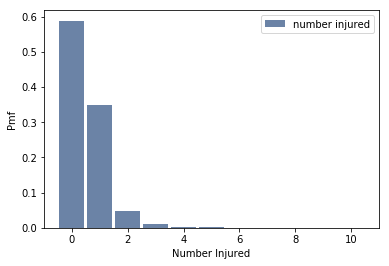

In [53]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Number Injured', ylabel='Pmf')

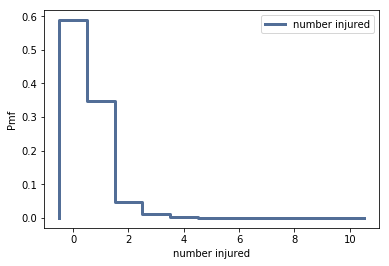

In [54]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='number injured', ylabel='Pmf')

In [55]:
pmf_one = thinkstats2.Pmf(one.n_injured, label='one gun')
pmf_more = thinkstats2.Pmf(more.n_injured, label='more than one gun')

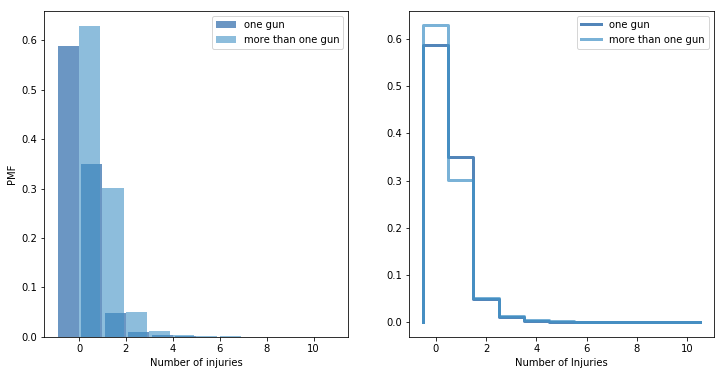

In [56]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_one, align='right')
thinkplot.Hist(pmf_more, align='left')
thinkplot.Config(xlabel='Number of injuries', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_one, pmf_more])
thinkplot.Config(xlabel='Number of Injuries')

The PMF comparing the number of injuries with only one gun or more guns shows that there are slightly more injuries when more than one gun is involved. Next we will create a CDF

In [57]:
# compute the distribution of deaths for one gun and more guns
one_gun_killed = one.n_killed 
more_gun_killed = more.n_killed

one_gun_killed_pmf = thinkstats2.Pmf(one_gun_killed, label='one gun')
more_gun_killed_pmf = thinkstats2.Pmf(more_gun_killed, label='more guns')

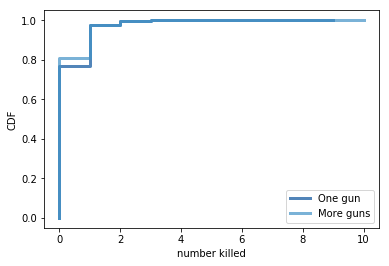

In [58]:
# distribution of number of deaths
cdf_one = thinkstats2.Cdf(one.n_killed, label='One gun')
cdf_more = thinkstats2.Cdf(more.n_killed, label='More guns')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_one, cdf_more])
thinkplot.Config(xlabel='number killed', ylabel='CDF')

We can see that the use of more guns slightly increased the chance of 0 or 1 people dying, but it doesn't affect the chances of more people dying.Now I will plot an analytical distribution.

In [59]:
import analytic

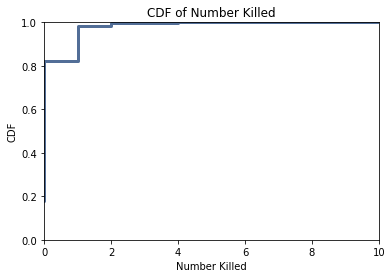

In [89]:
# CDF of number killed
diffs = gv.n_killed.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number Killed', ylabel='CDF', title='CDF of Number Killed',axis=[0,10,0,1])

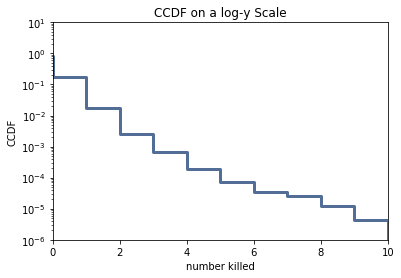

In [90]:
#CCDF on a log-y scale
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='number killed', axis=[0,10,.000001,10],
                 ylabel='CCDF', title='CCDF on a log-y Scale', yscale='log', loc='upper right')

The line is not straight, which shows that the exponential distribution is not a good model for this data. We cannot assume that the number of people killed in gun violence can be any number. This fits with the previous analysis showing that a majority of gun violence incidents result in 0 or 1 deaths.

In [62]:
# function to select a random subset
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [63]:
sample = SampleRows(gv, 5000)
killed, guns = sample.n_killed, sample.n_guns_involved

In [64]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [65]:
killed = Jitter(killed)
guns = Jitter(guns)

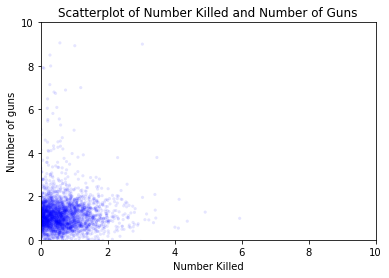

In [92]:
thinkplot.Scatter(killed, guns, alpha=.1,s=10)
thinkplot.Config(xlabel='Number Killed', axis=[0,10,0,10],
                 ylabel='Number of guns', title='Scatterplot of Number Killed and Number of Guns',
                 legend=False)

This scatterplot shows that a large majority of gun violence occurs with 1 or 2 guns and between 0 and 1 deaths.

In [67]:
# function to calculate covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [68]:
# the number killed and the number of guns has a small negative correlation
Cov(killed,guns)

-0.014864669432290731

In [69]:
# calculate Pearson's correlation. It shows a small negative correlation
np.corrcoef(killed,guns)

array([[ 1.        , -0.02353991],
       [-0.02353991,  1.        ]])

In [70]:
# calculate Spearman's correlation
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [71]:
# Also shows a small negative correlation
SpearmanCorr(killed,guns)

-0.015417578632703145

In [107]:
sample = SampleRows(gv, 5000)
injured, guns = sample.n_injured, sample.n_guns_involved

In [110]:
injured = Jitter(injured)
guns = Jitter(guns)

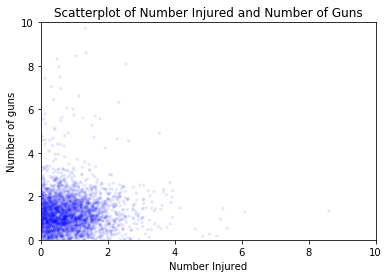

In [116]:
thinkplot.Scatter(injured, guns, alpha=.1,s=10)
thinkplot.Config(xlabel='Number Injured', axis=[0,10,0,10],
                 ylabel='Number of guns', title='Scatterplot of Number Injured and Number of Guns',
                 legend=False)

This scatterplot shows that a large majority of gun violence occurs with 1 or 2 guns and between 0 and 2 injuries.

In [112]:
# the number injured and the number of guns has a small negative correlation
Cov(injured,guns)

-0.026855016696181844

In [113]:
# calculate Pearson's correlation. It shows a small negative correlation
np.corrcoef(injured,guns)

array([[ 1.        , -0.03112071],
       [-0.03112071,  1.        ]])

In [114]:
# Also shows a small negative correlation
SpearmanCorr(injured,guns)

-0.019889121627564864

In [73]:
# Least squares function
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [74]:
# least squares fit to number injured as a function of guns involved
inter, slope = LeastSquares(gv.n_guns_involved, gv.n_injured)
inter, slope

(0.5337650825950729, -0.033937716378932586)

In [76]:
# function to evaluate the fitted line
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [120]:
fit_xs, fit_ys = FitLine(gv.n_guns_involved, inter, slope)

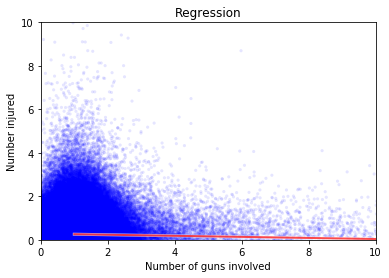

In [125]:
# plot regression
thinkplot.Scatter(Jitter(gv.n_guns_involved), Jitter(gv.n_injured), color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Number of guns involved", axis=[0,10,0,10],
                 ylabel='Number injured',title='Regression',
                 legend=False)

This regression shows that as the number of guns involved increases, the number of injured slowly decreases.